# Your Name Here: Daniel Rodriguez

# A3 LogisticRegression, Multi-layer Perceptron (MLP)

## 1. Load data and perform general EDA (3+2+1+3+6 = 15pts)

### 1.1 import libraries: numpy, matplotlib.pyplot and pandas. (1+1+1 = 3pts)

You can import other libraries below as needed in any block.

In [ ]:
# TODO
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sns
import sklearn

### 1.2 import the data to a pandas dataframe and show the count of rows and columns (2pts)

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

file_name = '/content/drive/MyDrive/CAP_4611/Assignment3/Wine_Quality_Data.csv' #you may need to change this line depending on the location of your file in Google Drive
with open(file_name, 'r') as file:
    # TODO
    df = pd.read_csv(file_name)
    del df[df.columns[0]] #removes the first index column from the dataframe
# TODO
print('Count of rows and columns', df.shape)

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
Count of rows and columns (6497, 12)


### 1.3 Show if any column has null values. (1pt)

In [ ]:
# TODO
df.isna().sum().sort_values(ascending = False)

volatile_acidity        0
citric_acid             0
residual_sugar          0
chlorides               0
free_sulfur_dioxide     0
total_sulfur_dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
color                   0
dtype: int64

### 1.4 We will use the 'quality' column as our target label. Print the count of each label in the dataset (in percentage). Mention which quality scores are among top 3 by their counts. (3pts)

In [ ]:
# TODO
print(df['quality'].value_counts(normalize = True, ascending = False).mul(100).round(1).astype(str) + '%')
top_3 = df['quality'].value_counts().head(3).index.tolist()
print("\nTop 3 quality scores by counts:", top_3)

6    43.7%
5    32.9%
7    16.6%
4     3.3%
8     3.0%
3     0.5%
9     0.1%
Name: quality, dtype: object

Top 3 quality scores by counts: [6, 5, 7]


### 1.5 Observe the correlation matrix for the columns. Name the pairs of columns with highest positive and highest negative correlations. (2+4 = 6pts) 

You can import and use seaborn here to visualize correlation matrix in a heatmap.

The pair of columns with the highest positive correlation is: [('free_sulfur_dioxide', 'total_sulfur_dioxide')]
The pair of columns with the highest negative correlation is: [('density', 'alcohol')]


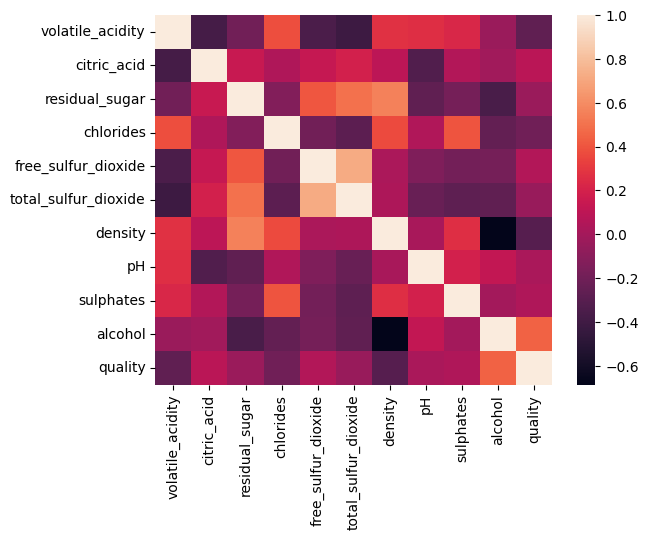

In [ ]:
# TODO
corr_matrix = df.corr()
sns.heatmap(corr_matrix)

corr_pairs = corr_matrix.stack().sort_values(ascending=False)
highest_pos_corr = corr_pairs[corr_pairs != 1].head(1).index.tolist()
highest_neg_corr = corr_pairs.tail(1).index.tolist()

print("The pair of columns with the highest positive correlation is:", highest_pos_corr)
print("The pair of columns with the highest negative correlation is:", highest_neg_corr)

## 2. Feature Selection and Preprocessing (2+2+3+3 = 10pts)

### 2.1 Drop the 'color' attribute from the dataframe. (2pts)

In [ ]:
# TODO
df = df.drop('color',axis=1)
print(df.head())

   volatile_acidity  citric_acid  residual_sugar  chlorides  \
0              0.70         0.00             1.9      0.076   
1              0.88         0.00             2.6      0.098   
2              0.76         0.04             2.3      0.092   
3              0.28         0.56             1.9      0.075   
4              0.70         0.00             1.9      0.076   

   free_sulfur_dioxide  total_sulfur_dioxide  density    pH  sulphates  \
0                 11.0                  34.0   0.9978  3.51       0.56   
1                 25.0                  67.0   0.9968  3.20       0.68   
2                 15.0                  54.0   0.9970  3.26       0.65   
3                 17.0                  60.0   0.9980  3.16       0.58   
4                 11.0                  34.0   0.9978  3.51       0.56   

   alcohol  quality  
0      9.4        5  
1      9.8        5  
2      9.8        5  
3      9.8        6  
4      9.4        5  


### 2.2 Assign the 'quality' column to target label y, and all other columns to attribute matrix X (1+1 = 2pts)

In [ ]:
# TODO
x = df.loc[:, df.columns != 'quality']
y = df['quality']

### 2.3 Use scikitlearn's Standard Scaler to scale the feature matrix X. (3pts)

In [ ]:
# TODO
from sklearn import preprocessing
scaler =  preprocessing.StandardScaler()
x = scaler.fit_transform(x)

### 2.4 Split Dataset into Training and Test set. (3 pts)
Use 80:20 split for training and test. Also use stratified sampling to ensure balanced dataset.

In [ ]:
# TODO
from sklearn import model_selection
TS = 0.2 #for tuning
print("\nTest Size = ", TS, "\n")
x_train, x_test, y_train, y_test = model_selection.train_test_split(x, y, test_size=TS, random_state=42,stratify=y)



Test Size =  0.2 



## 3. Logistic Regression from scratch (10+10+10+25+20 = 75pts)


In this section, you will write a logistic regression algorithm from scratch using python and numpy. You will first write some helper functions for transforming label encoding to one-hot encoding, for measuring the cross-entropy loss and predicting labels from test data. These functions will later be used in the logistic regression training and testing.   

### 3.1 The target label in our dataset is the 'quality' column. It consists of categorical values, label-encoded with 7 values in the range [3-9]. To perform a multiclass logistic regression, you need a function that takes a label matrix and converts it to One-hot encoded labels. (10pts)

Write the function below following the docstring. 

In [ ]:
def onehot(y):
    """
    Converts an array of labels to one-hot encoding.

    Parameters:
    -----------
    y : numpy.ndarray
        An array of labels. It must have a shape of (n_samples, ).

    Returns:
    --------
    numpy.ndarray
        A matrix of one-hot encoding. It has a shape of (n_samples, n_classes).
    """
    
    # TODO
    n_classes = np.max(y) + 1
    onehot_labels = np.zeros((len(y), n_classes))
    onehot_labels[np.arange(len(y)), y] = 1
    return onehot_labels

### 3.2 For multi-class classification, you also need to measure cross-entropy loss. Cross-entropy loss is measured by the following formula:
$\text{Cross-Entropy Loss} = -\frac{1}{N} \sum_{i=1}^N \sum_{j=1}^n y_{ij} \log \hat{y}_{ij}$

Write a function that takes two matrices: one matrix of true labels $y_{ij}$, and one matrix of the predicted labels by your model $\hat{y}_{ij}$ (you are about to write the model function soon below), and returns the computed loss. **(10pts)**


In [ ]:
def cross_entropy_loss(y_true, y_pred):
    """
    Computes the cross-entropy loss between the true labels and predicted labels.

    Parameters
    ----------
    y_true : numpy array
        Array of true labels with shape (m, n_classes).
    y_pred : numpy array
        Array of predicted labels with shape (m, n_classes).

    Returns
    -------
    float
        Cross-entropy loss between y_true and y_pred.

    Notes
    -----
    This function assumes that the labels are one-hot encoded.
    """
    
    # TODO
    loss = -y_true * np.log(y_pred)
    loss = np.sum(loss)
    loss = np.mean(loss) / y_true.shape[0]
    return loss

### 3.3 Write a function for softmax activation to compute probabilities from the linear score $z_i$. Softmax function uses the following formula:
$$\sigma(z_i) = \frac{e^{z_i}}{\sum_{j=1}^{k}e^{z_j}} , \text{for } i=1,2,3,...,k $$
where $z_i$ is the linear layer score for i-th input.   

**(10pts)**

In [ ]:
def softmax(scores):
    """
    Compute the softmax of the given scores.

    Parameters:
    -----------
    scores : numpy.ndarray
        A 2D numpy array of shape (m, n), where m is the number of samples and n is the number of classes.

    Returns:
    --------
    probs : numpy.ndarray
        A 2D numpy array of shape (m, n) containing the probabilities of each sample belonging to each class.
    """
       
    # TODO
    exp_scores = np.exp(scores - np.max(scores, axis=1, keepdims=True))
    probs = exp_scores / np.sum(exp_scores, axis=1, keepdims=True)
    return probs

### 3.4 Model development (20+5 = 25pts)

**3.4.1** Write a function for the logistic regression algorithm. You will use the functions you have written above in this module. Recall that with gradient descent optimization, the computation loop goes as:
For each epoch:
1. Compute $scores = X_{train} W + b$ 
2. Compute probability = softmax(scores)
3. Compute Cross-entropy Loss
4. Compute gradients of the loss with respect to the weights and bias.

    Partial derivative of Loss with respect to Weight matrix:
    $$\frac{\partial L}{\partial W} = -\frac{1}{m} X^T \left(y - \hat{y}\right)$$

    Partial derivative of Loss with respect to Bias matrix:
    $$\frac{\partial L}{\partial b_j} = -\frac{1}{m} \sum_{i=1}^m \left(y_{ij} - p_{ij}\right) $$

5. Update the weights and biases
    $$ W = W - (learning\ rate * weight\ gradient)  $$
    $$ b = b - (learning\ rate * weight\ gradient)  $$

**(20pts)**

In [ ]:
def logistic_regression(X_train, y_train, ):
    """
    Performs logistic regression using softmax activation and gradient descent optimizer to classify the input data.

    Parameters:
    -----------
    X_train : numpy.ndarray
        The input training data of shape (num_samples, num_features).
    y_train : numpy.ndarray
        The training labels of shape (num_samples,).

    Returns:
    --------
    W : numpy.ndarray
        The learned weights of shape (num_features, num_classes).
    b : numpy.ndarray
        The learned bias of shape (1, num_classes).
    loss_list : list
        The list of loss values at each epoch during training.
    """

    # get the number of samples and features from X_train (2pts)
    # TODO
    m,n = X_train.shape
    
    # convert training labels to one-hot encoded labels (2pts)
    # TODO
    y_train = onehot(y_train)

    # get the number of target classes from y_train (2pts)
    # TODO
    k = y_train.shape[1]

    # initialize the weights and bias with numpy arrays of zeros (1+1 = 2pts)
    # TODO
    W = np.zeros((n,k))
    b = np.zeros((1,k))

    # set hyperparameters (1+1 = 2pts)
    ## set a learning rate
    # TODO  
    learning_rate = 0.001

    ## set the max number of epochs you want to train for
    # TODO
    max_epochs =  1000
    
    ## initialize a list to store the loss values (1pt)
    # TODO
    loss_list = []
    
    
    '''
    Write a for loop over epochs.
    In each epoch:
        compute the score for each class, 
        compute the softmax probabilities, 
        compute the cross-entropy loss, 
        compute the gradients of the loss with respect to the weights and bias, 
        update the weights and bias using the gradients and the learning rate.
    '''
    # (9pts)
    # TODO
    for epoch in range(max_epochs):
        # compute the score (Z) for each class. 
        # TODO
        scores = np.dot(X_train, W) + b
        
        # calculate the softmax probabilities
        # TODO
        probs = softmax(scores)

        # compute the cross-entropy loss
        # TODO
        loss = cross_entropy_loss(y_train, probs)
        loss_list.append(loss)

        # compute the gradients of the loss with respect to the weights and bias
        # TODO
        dW = (-1/m) * np.dot(X_train.T, y_train - probs)
        db = (-1/m) * np.sum(y_train - probs, axis=0, keepdims=True)
        
        # update the weights and bias using the gradients and the learning rate
        # TODO
        W = W - (learning_rate * dW)
        b = b - (learning_rate * db)

        # For tracking progress, print the loss every 100 epochs
        # TODO
        if (epoch+1) % 100 == 0:
            print("Epoch",(epoch+1),"/",max_epochs,"Loss:",loss)
    return W,b,loss_list

**3.4.2** Now that you have the model and the helper function, train the model with your prepared training dataset. Then plot the training loss curve. **(5pts)**

Epoch 100 / 1000 Loss: 2.269519391046616
Epoch 200 / 1000 Loss: 2.2370045260259133
Epoch 300 / 1000 Loss: 2.205380825245785
Epoch 400 / 1000 Loss: 2.174648212671293
Epoch 500 / 1000 Loss: 2.1448045091967365
Epoch 600 / 1000 Loss: 2.115845345078129
Epoch 700 / 1000 Loss: 2.0877641265856752
Epoch 800 / 1000 Loss: 2.060552061278056
Epoch 900 / 1000 Loss: 2.0341982398563894
Epoch 1000 / 1000 Loss: 2.008689766771004


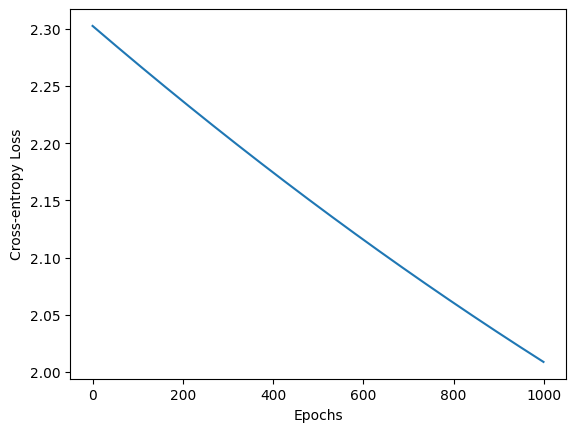

In [ ]:
# train the model
# TODO
W, b, loss_list = logistic_regression(x_train, y_train)
# plot the loss curve
# TODO
plt.plot(loss_list)
plt.xlabel('Epochs')
plt.ylabel('Cross-entropy Loss')
plt.show()

### 3.5 Evaluation (10+1+4+3+2 = 20pts)

Write a function to predict the labels of X_test using the model trained above and return the predicted labels as categorical values similar to train labels. **(10pts)**

Note: By default, the predicted labels may return values within [0-6] instead of the original labels [3-9]. This can happen due to using argmax() to get label encoding from one-hot encoding when predicting test labels. You can add a simple offset to the argmax outputs of predicted labels to shift them to the range of [3-9]. This is important to note as you may see a very low accuracy even with a good model if true labels and predicted labels are not associated with the same categorical scale. 

In [ ]:
def predict(X_test, W, b):
    '''
    X_test: a numpy array of testing features
    W: a numpy array of weights
    b: a numpy array of bias
    return: a numpy array of one-hot encoded labels
    '''
    # compute the scores
    # TODO
    scores= np.dot(X_test,W) + b

    # compute the probabilities
    # TODO 
    probs = softmax(scores)

    # get the predicted labels
    # TODO
    predicted_labels = np.argmax(probs, axis=1) + 3

    # return the predicted labels
    # TODO
    n_classes = W.shape[1]
    predicted_labels_one_hot = np.eye(n_classes)[predicted_labels - 3]

    return predicted_labels_one_hot


**3.5.1** import accuracy_score, confusion_matrix, precision_score, recall_score and f1_score from scikitlearn **(1pts)**

In [ ]:
# TODO
from sklearn.metrics import accuracy_score, confusion_matrix, precision_score, recall_score, f1_score;

**3.5.2** Print the prediction scores on test data in terms of accuracy, precision and recall score. **(4pts)**

In [ ]:
# TODO
y_pred = np.argmax(predict(x_test, W, b), axis=1)
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy Score:", accuracy)

precision = precision_score(y_test, y_pred, average='weighted', zero_division=1)
print("Precision Score:", precision)

recall = recall_score(y_test, y_pred, average='weighted')
print("Recall Score:", recall)

Accuracy Score: 0.49615384615384617
Precision Score: 0.5178564006017626
Recall Score: 0.49615384615384617


**3.5.3** Generate and visualize the confusion matrix. You can use seaborn heatmap to visualize a heatmap of the confusion matrix. **(3pts)**

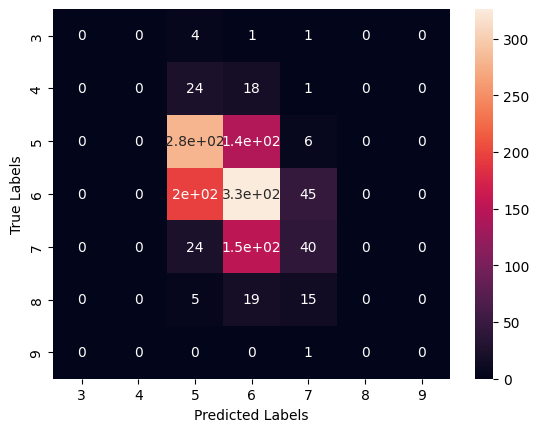

In [ ]:
# TODO
#print(y_test.shape)
#print(np.argmax(y_pred, axis=1).shape)
#print(np.argmax(y_pred, axis=1))
#print(y_test.ravel())
conf = confusion_matrix(y_test.ravel(),y_pred)

sns.heatmap(conf,annot=True,xticklabels=range(3, 10), yticklabels=range(3, 10))
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.show()

**3.5.4** Which labels seem to be harder to classify for this model? **(2pts)**

/ # TODO
It would appear that labels 3,4,8,9 look the most difficult to classify based on the confusion matrix above.

## 4. Using Scikitlearn Logistic Regression (4+2+7+2 = 15pts)

### 4.1 Import LogisticRegressionCV module and create an instance of it. (4pts)
Use the following parameters:
1. 5-fold crossvalidation, 
2. lbfgs solver, 
3. run for 1000 iterations 
4. use 'multinomial' for choosing softmax classifier  

In [ ]:
# TODO
from sklearn import linear_model
clf = linear_model.LogisticRegressionCV(cv=5,solver='lbfgs', max_iter=1000, multi_class='multinomial')

### 4.2 Train the model and predict the labels for test set. (2pts) 

In [ ]:
# TODO
clf.fit(x_train, y_train)

y_pred_clf = clf.predict(x_test)

/usr/local/lib/python3.9/dist-packages/sklearn/model_selection/_split.py:700: UserWarning: The least populated class in y has only 4 members, which is less than n_splits=5.
  warnings.warn(


### 4.3 Compute the accuracy, precision, recall and F1 scores. Also visualize the confusion matrix. (1+1+1+1+3 =7pts) 

Accuracy Score: 0.5346153846153846
Precision Score: 0.5699097582305398
Recall Score: 0.5346153846153846


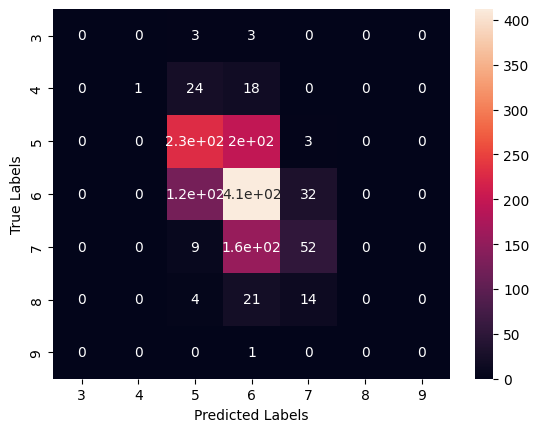

In [ ]:
# TODO
accuracy = accuracy_score(y_test, y_pred_clf)
print("Accuracy Score:", accuracy)

precision = precision_score(y_test, y_pred_clf, average='weighted', zero_division=1)
print("Precision Score:", precision)

recall = recall_score(y_test, y_pred_clf, average='weighted')
print("Recall Score:", recall)

conf = confusion_matrix(y_test.ravel(),y_pred_clf)

sns.heatmap(conf,annot=True,xticklabels=range(3, 10), yticklabels=range(3, 10))
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.show()

### 4.4 Did your previous model (built from scratch) and the model from scikitlearn library produced similar evaluation scores? (2pts)

Explain (in <100 words) the similarity and dissimilarity in score. What changed, what didn't, and why?

/ # TODO
Both models appears to have a simliarity in overall difficulty in predicting certain labels, their heatmaps (while not exactly the same values) had the same structure and near same color gradient. As for the scores, they appeaared to be better on the sklearn LogisticRegression package.

## 5. Using Scikitlearn Multi-layer Perceptron (16+19 = 35pts)

### 5.1 MLP with one hidden layer and stochastic gradient descent optimizer (4+2+1+7+2 = 16pts)

**5.1.1** Import MLPClassifier from scikitlearn's neural_network library. Then create a model instance of this classifier.

Use the following parameters: 
1. One hidden layer with 100 neurons, 
2. ReLu activation, 
3. Stochastic Gradient Descent solver
4. Learning rate = 0.01 (or you can continue to use your previous learning rate)
5. No of epoch = 1000

Also, set random_state to a fixed value so that your result is reproducible. **(4pts)** 

In [ ]:
# TODO
from sklearn import neural_network

mlp = neural_network.MLPClassifier(hidden_layer_sizes=(100,), activation = 'relu', solver = 'sgd', learning_rate_init = 0.01, max_iter = 1000, random_state = 42)

**5.1.2** Train the model with training set.
Then predict the labels for test set. **(2pts)**

In [ ]:
# TODO
mlp.fit(x_train, y_train)
y_pred_mlp = mlp.predict(x_test)

**5.1.3** Plot the loss curve **(1pt)**

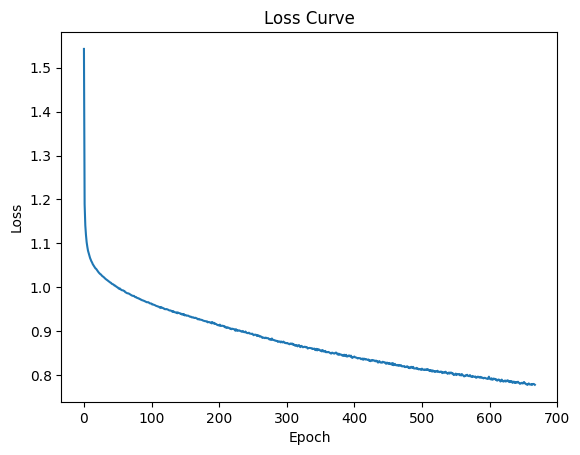

In [ ]:
# TODO
plt.plot(mlp.loss_curve_)
plt.title('Loss Curve')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.show()

**5.1.4** Print the accuracy, precision, recall and F1 scores. Also show the confusion matrix. **(1+1+1+1+3 = 7pts)**

Accuracy Score: 0.5638461538461539
Precision Score: 0.5507324467897696
Recall Score: 0.5638461538461539


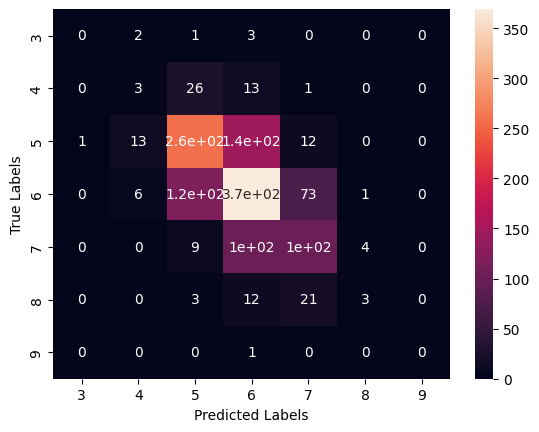

In [ ]:
# TODO
accuracy = accuracy_score(y_test, y_pred_mlp)
print("Accuracy Score:", accuracy)

precision = precision_score(y_test, y_pred_mlp, average='weighted', zero_division=1)
print("Precision Score:", precision)

recall = recall_score(y_test, y_pred_mlp, average='weighted')
print("Recall Score:", recall)

conf = confusion_matrix(y_test.ravel(),y_pred_mlp)

sns.heatmap(conf,annot=True,xticklabels=range(3, 10), yticklabels=range(3, 10))
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.show()

**5.1.5** Did you see any change in scores after using the MLP classifier?

In <100 words, describe your observation. **(2pts)**

/ # TODO
Once more the scores are better than the first model with a slight increase in scores in comparison to the sklearn LogisticRegression package except in Precision. The shape for the heatmap again mirrors that of the other two with similar gradients meaning similar difficulty in predicting the lower and upper bounds of the labels.

### 5.2 MLP with two hidden layer and adam optimizer (4+2+1+7+2+3 = 19pts)

**5.2.1** Import MLPClassifier from scikitlearn's neural_network library. Then create a model instance of this classifier.

Use the following parameters: 
1. **Two** hidden layers with 100 neurons, 
2. ReLu activation, 
3. Adam solver (this is an advanced optimizer which we did not cover in class. However the usage is quite straightforward)
4. Learning rate = 0.01 (or you can continue to use your previous learning rate)
5. No of epoch = 1000

Also, set random_state to a fixed value so that your result is reproducible. **(4pts)** 

(Refer to the scikitlearn documentation for clarification on the parameters)

In [ ]:
# TODO
mlp_2 = neural_network.MLPClassifier(hidden_layer_sizes=(100,100), activation = 'relu', solver = 'adam', learning_rate_init = 0.01, max_iter = 1000, random_state = 42)

**5.2.2** Train the model with training set.
Then predict the labels for test set. **(2pts)**

In [ ]:
# TODO
mlp_2.fit(x_train, y_train)
y_pred_mlp_2 = mlp_2.predict(x_test)

**5.2.3** Plot the loss curve **(1pt)**

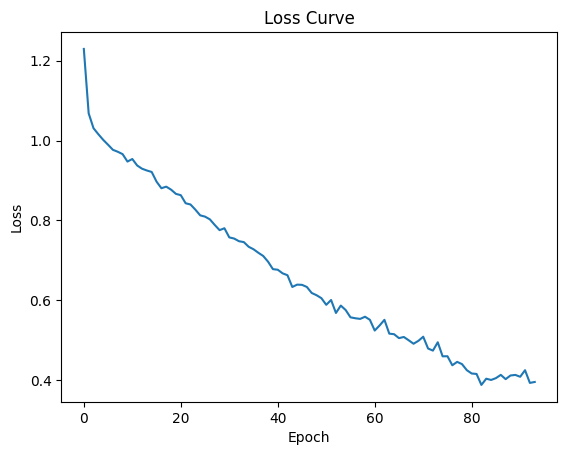

In [ ]:
# TODO
plt.plot(mlp_2.loss_curve_)
plt.title('Loss Curve')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.show()

**5.2.4** Print the accuracy, precision, recall and F1 scores. Also show the confusion matrix. **(1+1+1+1+3 = 7pts)**

Accuracy Score: 0.5907692307692308
Precision Score: 0.5876089777824254
Recall Score: 0.5907692307692308


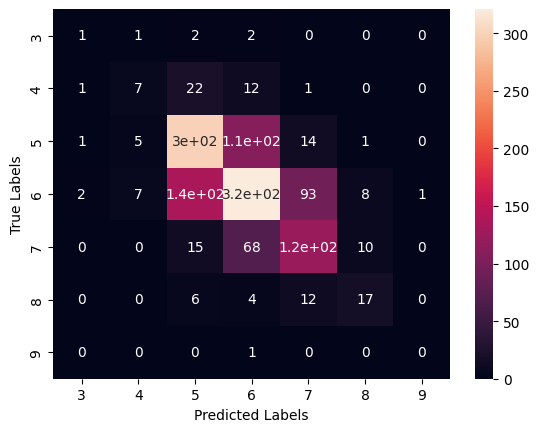

In [ ]:
# TODO
accuracy = accuracy_score(y_test, y_pred_mlp_2)
print("Accuracy Score:", accuracy)

precision = precision_score(y_test, y_pred_mlp_2, average='weighted', zero_division=1)
print("Precision Score:", precision)

recall = recall_score(y_test, y_pred_mlp_2, average='weighted')
print("Recall Score:", recall)

conf = confusion_matrix(y_test.ravel(),y_pred_mlp_2)

sns.heatmap(conf,annot=True,xticklabels=range(3, 10), yticklabels=range(3, 10))
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.show()

**5.2.5** Describe any difference in the loss curve from MLP with one hidden layer and MLP with two hidden layer. **(2pts)**

/ # TODO
The loss curve with one hidden layer had a smoother line in comparison to the two hidden layer. But the two hidden layer did contain a more linear line where the single hidden layer appeared more exponential.

**5.2.6** Did you see any change in scores between the two MLP models?

In <100 words, describe your observation. **(3pts)**

/ # TODO
The scores appeared to improve in the two hidden layer in comparison to the single across all scores. Leading to each of the scores improving between each models overall.